# E-commerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'Datasets/E-commerce.xlsx'

customers = pd.read_excel(path, sheet_name='customers')
genders = pd.read_excel(path, sheet_name='genders')
cities = pd.read_excel(path, sheet_name='cities')
transactions = pd.read_excel(path, sheet_name='transactions')
branches = pd.read_excel(path, sheet_name='branches')
merchants = pd.read_excel(path, sheet_name='merchants')

In [12]:
df_principal = pd.merge(transactions, customers, how='left', on='customer_id')
df_principal = pd.merge(df_principal, genders, how='left', on='gender_id')
df_principal = pd.merge(df_principal, cities, how='left', on='city_id')
df_principal = pd.merge(df_principal, branches, how='left', on='branch_id')
df_principal = pd.merge(df_principal, merchants, how='left', on='merchant_id')
df_principal.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez


In [8]:
print("Dados null")
df_principal.isnull().sum()

Dados null


transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
join_date                0
city_id                  0
gender_id                0
gender_name              0
city_name                0
merchant_id              0
merchant_name            0
dtype: int64

In [9]:
df_principal.describe()

,transaction_id,customer_id,transaction_date,burn_date,branch_id,join_date,city_id,gender_id,merchant_id
count,5000.000000,5000.000000,5000,2516,5000.000000,5000,5000.000000,5000.00000,5000.000000
mean,2500.500000,509.551600,2023-10-22 04:38:47.040000,2023-12-01 20:39:06.581876224,5.529800,2023-01-18 14:41:34.080000,10.091800,1.48660,12.882600
min,1.000000,1.000000,2021-08-05 00:00:00,2021-08-14 00:00:00,1.000000,2021-07-18 00:00:00,1.000000,1.00000,7.000000
25%,1250.750000,262.000000,2023-05-31 18:00:00,2023-07-12 00:00:00,3.000000,2022-04-10 00:00:00,5.000000,1.00000,9.000000
50%,2500.500000,514.000000,2024-01-02 00:00:00,2024-02-11 00:00:00,6.000000,2023-01-11 00:00:00,10.000000,1.00000,13.000000
75%,3750.250000,758.000000,2024-05-08 00:00:00,2024-06-18 00:00:00,8.000000,2023-10-25 00:00:00,15.000000,2.00000,15.000000
max,5000.000000,1000.000000,2024-07-14 00:00:00,2024-10-08 00:00:00,10.000000,2024-07-13 00:00:00,20.000000,2.00000,20.000000
std,1443.520003,287.065172,NaN,NaN,2.895788,NaN,5.860703,0.49987,4.000452


In [20]:
df_principal.dtypes

transaction_id                 int64
customer_id                    int64
transaction_date      datetime64[ns]
transaction_status            object
coupon_name                   object
burn_date             datetime64[ns]
branch_id                      int64
join_date             datetime64[ns]
city_id                        int64
gender_id                      int64
gender_name                   object
city_name                     object
merchant_id                    int64
merchant_name                 object
dtype: object

In [100]:
# Criando colunas adicionais
valor_min = 10
valor_max = 1000
df_principal['transaction_value'] = np.random.uniform(valor_min, valor_max, size=len(df_principal))
df_principal['transaction_month'] = df_principal['transaction_date'].dt.month
df_principal['transaction_year'] = df_principal['transaction_date'].dt.year

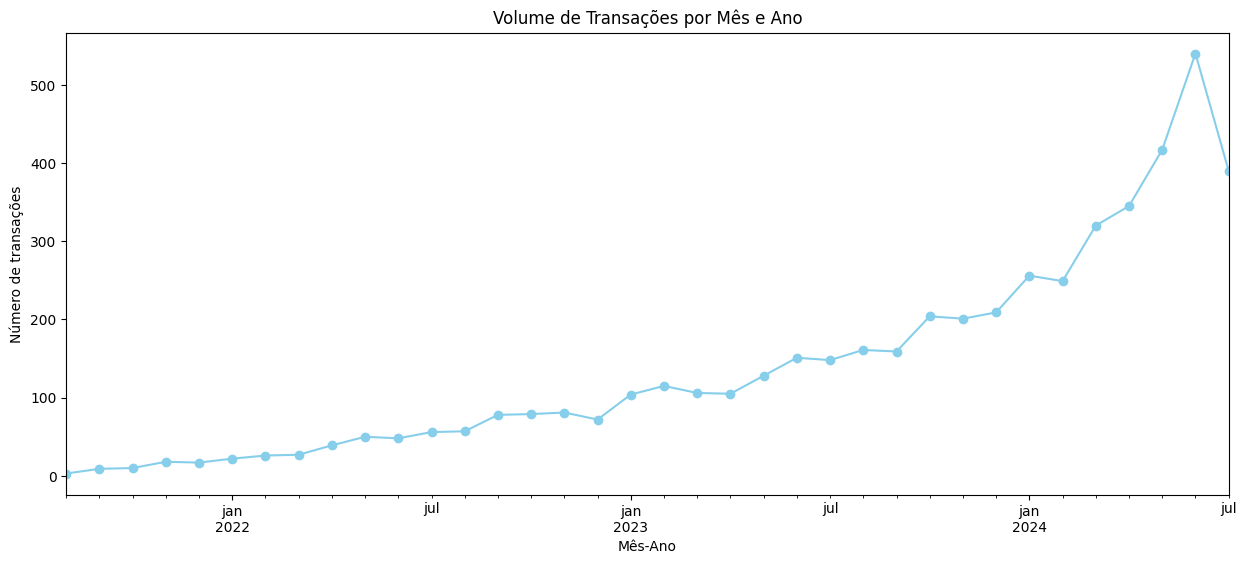

In [101]:
# Número de transações por Mês
plt.figure(figsize=(15, 6))
nm_transactions_for_month = df_principal.groupby(df_principal['transaction_date'].dt.to_period('M')).size()
nm_transactions_for_month.plot(kind='line', marker='o', color='skyblue')
plt.title("Volume de Transações por Mês e Ano")
plt.xlabel("Mês-Ano")
plt.ylabel("Número de transações")
plt.show()

Text(0, 0.5, 'Número de transações')

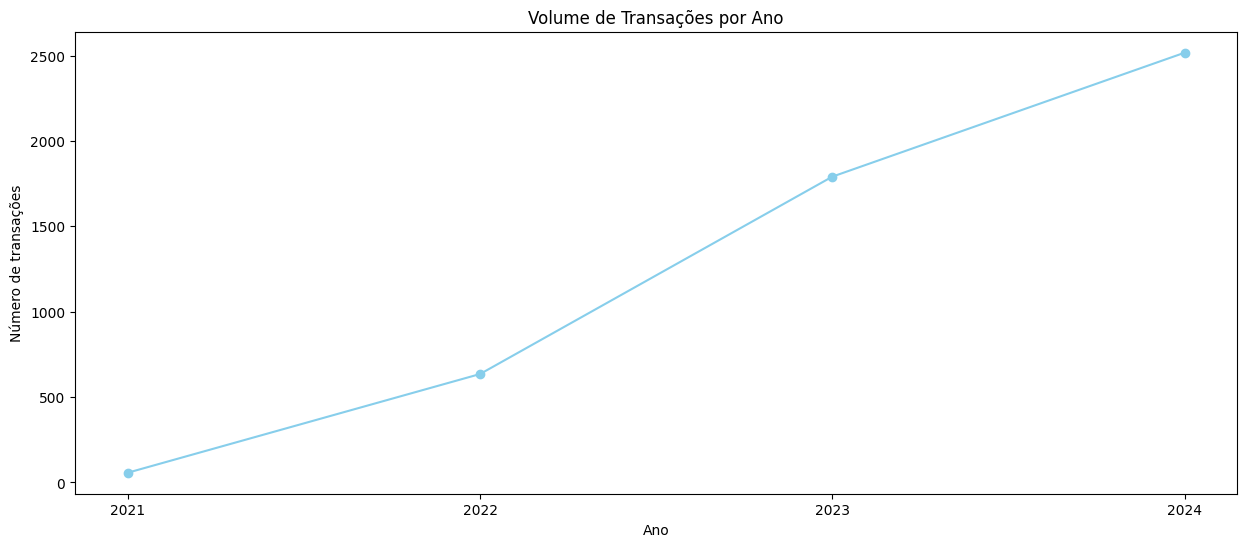

In [102]:
# Número de transações por Ano
plt.figure(figsize=(15, 6))
nm_transactions_for_month = df_principal.groupby(df_principal['transaction_date'].dt.to_period('Y')).size()
nm_transactions_for_month.index = nm_transactions_for_month.index.astype(str)
plt.plot(nm_transactions_for_month, marker='o', color='skyblue')
plt.title("Volume de Transações por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de transações")


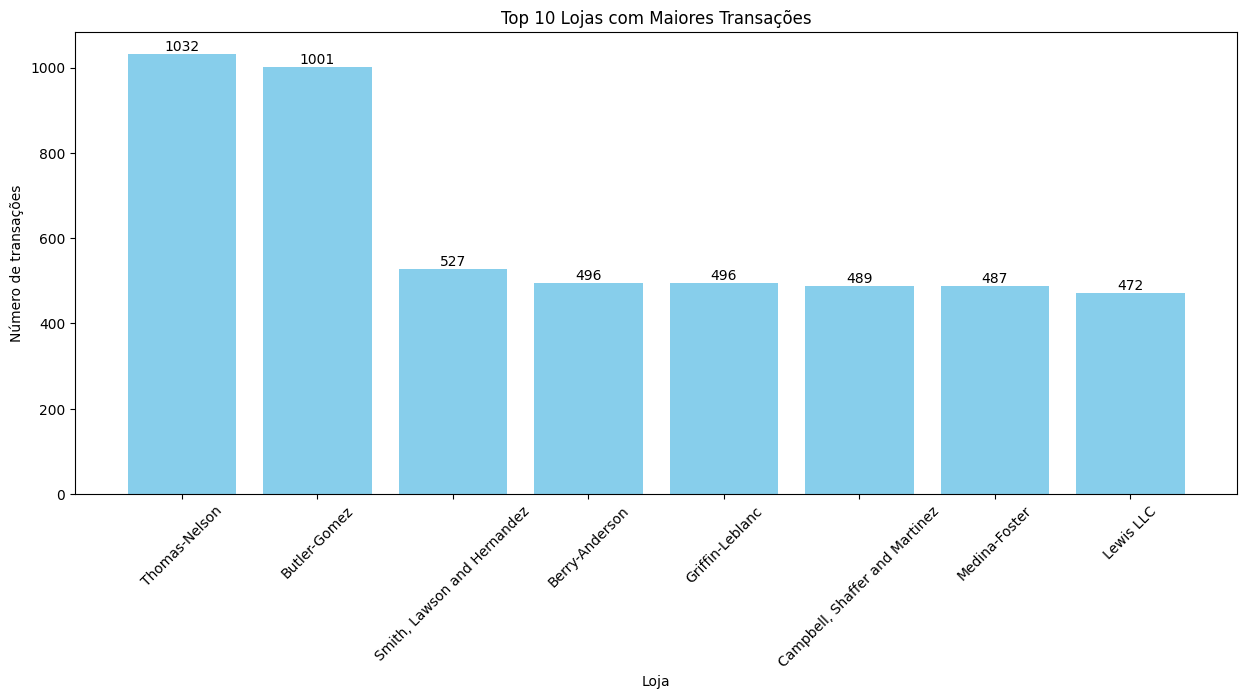

In [103]:
# Top 10 Lojas com Maiores Transações
plt.figure(figsize=(15, 6))
nm_transactions_for_client = df_principal.groupby('merchant_name').size().reset_index(name='transaction_count').sort_values(by='transaction_count', ascending=False).head(10)
bars = plt.bar(nm_transactions_for_client['merchant_name'], nm_transactions_for_client['transaction_count'], color='skyblue')
plt.title("Top 10 Lojas com Maiores Transações")
plt.xlabel("Loja")
plt.ylabel("Número de transações")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')
plt.show()

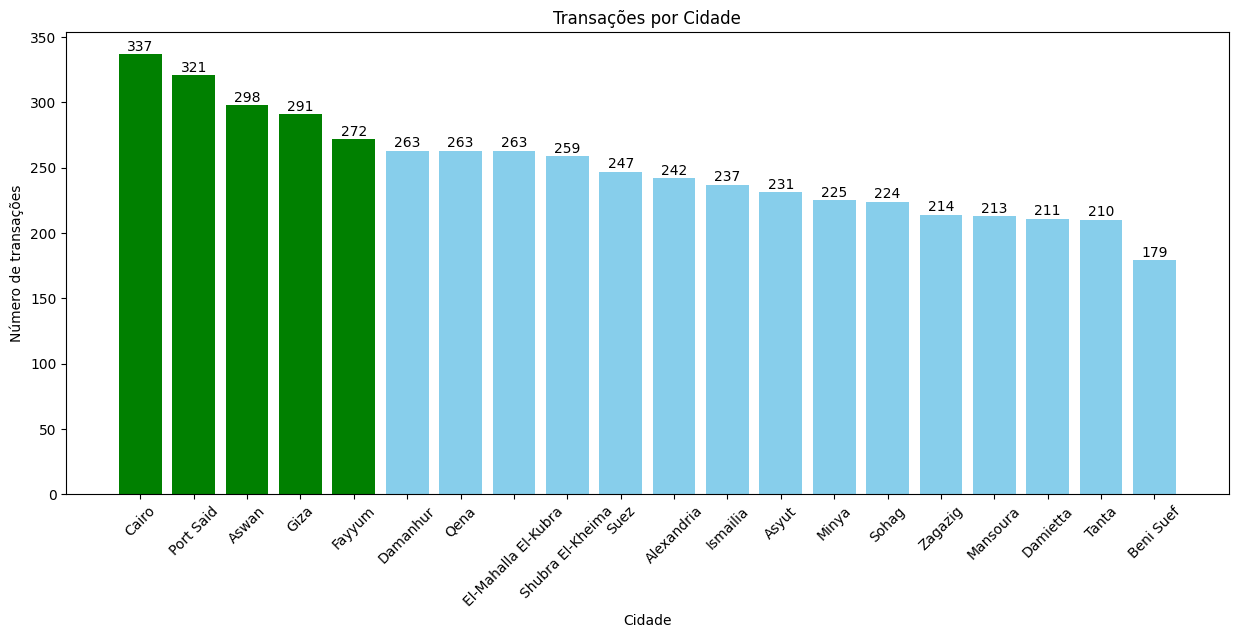

In [91]:
# Transações por Cidade
plt.figure(figsize=(15, 6))
nm_transactions_for_client = df_principal.groupby('city_name').size().reset_index(name='transaction_count').sort_values(by='transaction_count', ascending=False)
colors = ['skyblue' if i >= 5 else 'green' for i in range(len(nm_transactions_for_client))]

bars = plt.bar(nm_transactions_for_client['city_name'], nm_transactions_for_client['transaction_count'], color=colors)
plt.title("Transações por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Número de transações")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')
plt.show()

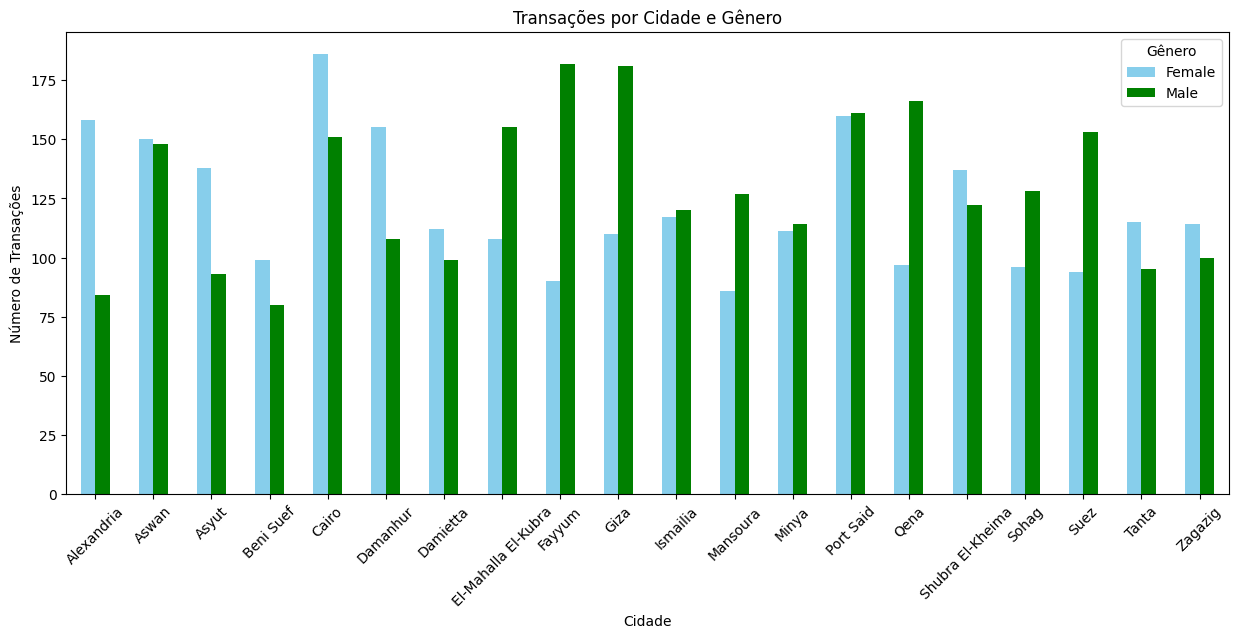

In [119]:
# Transações por Cidade e Gênero
transacoes_por_cidade_genero = df_principal.groupby(['city_name', 'gender_name']).size().unstack(fill_value=0)

cores = {'Male': 'green', 'Female': 'skyblue'}

transacoes_por_cidade_genero.plot(kind='bar',  figsize=(15, 6), color=[cores[col] for col in transacoes_por_cidade_genero.columns])
plt.title("Transações por Cidade e Gênero")
plt.xlabel("Cidade")
plt.ylabel("Número de Transações")
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()